# Download the dataset

In [ ]:
import httpx
import os

# Đường dẫn tới thư mục đích
folder_path = "dataset"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(folder_path, exist_ok=True)

# Gửi request tải file
response = httpx.get(
    "https://raw.githubusercontent.com/yashLadha/The_Math_of_Intelligence/master/Week1/ADRvsRating.csv",
    timeout=10,
)

# Ghi file nếu tải thành công
if response.status_code == 200:
    file_path = os.path.join(folder_path, "ADRvsRating.csv")
    with open(file_path, "wb") as f:
        f.write(response.content)
    print(f"✅ File downloaded successfully at: {file_path}")
else:
    print(f"❌ Failed to download file. Status code: {response.status_code}")


✅ File downloaded successfully at: dataset\ADRvsRating.csv


In [13]:
import pandas as pd
# Load and display basic info about the dataset
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADR     1000 non-null   float64
 1   Rating  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# Load and visual dataset

In [23]:
import numpy as np
file_path = "dataset\ADRvsRating.csv"
data = np.loadtxt(file_path, delimiter=",", skiprows=1)
X_train = data[:, 0].reshape(-1, 1)  # Feature: ADR
y_train = data[:, 1]                 # Target: Rating
X_train.shape, y_train.shape

((1000, 1), (1000,))

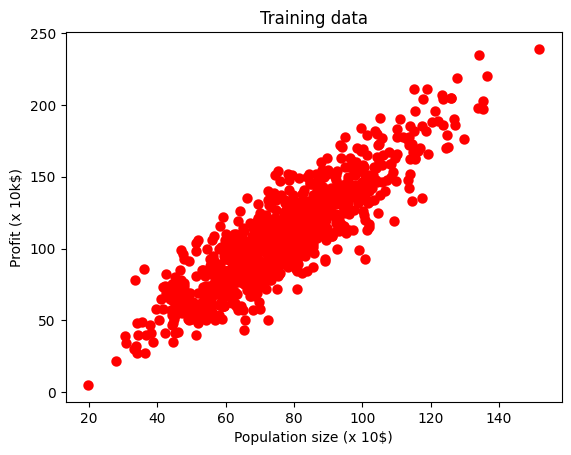

In [24]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(X_train, y_train, s=20, c='r', marker='o', linewidths=3) 
# plt.scatter(x_train, y_train, s=20, c='g', marker='o', linewidths=3) 
plt.title('Training data')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10k$)')
plt.show()

# Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

There are 2 possible implementations:

1. Unvectorized implementation (with *for* loops): 
$$
f_w(x_i) = w_0 + w_1 x_i
$$
<br>

1. Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function. <br>

Check your code correctness: The first 5 values of $f_w(x)$ are [-8.35,-7.53,-11.72,-9.60, -8.00] with $w_0=0.2, w_1=-1.4$. <br>

Hint: Respect the sizes of $X$ and $w$ when carrying out linear algebra multiplications. You may use numpy function `dot` for matrix multiplication.